In [30]:
# Importing necessary packages
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print("Succefully imported libraries!")

Succefully imported libraries!


In [49]:
df1=pd.read_csv("bom.movie_gross.csv")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [50]:
df1.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [51]:
print("Data frame rows and columns :",df1.shape)

Data frame rows and columns : (3387, 5)


In [52]:
print("Stats about the data :", df1.describe())

Stats about the data :        domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


In [53]:
unique_studios = df1['studio'].unique()
print(unique_studios)


['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TVC' 'FEF' 'EXCL

In [54]:

# Map categorical values to numerical values
df1['studio'] = pd.factorize(df1['studio'])[0]

# Print the updated dataframe
print(df1)


                                            title  studio  domestic_gross  \
0                                     Toy Story 3       0     415000000.0   
1                      Alice in Wonderland (2010)       0     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1       1     296000000.0   
3                                       Inception       1     292600000.0   
4                             Shrek Forever After       2     238700000.0   
...                                           ...     ...             ...   
3382                                    The Quake      29          6200.0   
3383                  Edward II (2018 re-release)      71          4800.0   
3384                                     El Pacto       8          2500.0   
3385                                     The Swan     256          2400.0   
3386                            An Actor Prepares     188          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2

In [55]:
print("Data types of the variables :",df1.dtypes)

Data types of the variables : title              object
studio              int64
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [58]:
print("Missing values:\n", df1.isnull().sum())


Missing values:
 title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [57]:
# Handling missing values
# Drop rows with any missing values
df1.dropna(inplace=True)


In [59]:
# Dropping un necessary columns
df1.drop("title",axis=1)

,studio,domestic_gross,foreign_gross,year
0,0,415000000.0,652000000,2010
1,0,334200000.0,691300000,2010
2,1,296000000.0,664300000,2010
3,1,292600000.0,535700000,2010
4,2,238700000.0,513900000,2010
...,...,...,...,...
3275,12,1400.0,1500000,2018
3286,21,725000.0,229000,2018
3309,249,10000.0,256000,2018
3342,252,93200.0,5200,2018


In [60]:
# Target variable 
y_target = df1["studio"]
#print('Target variable :',y_target.head())
y_target.head()

0    0
1    0
2    1
3    1
4    2
Name: studio, dtype: int64

In [61]:
df1.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [62]:
# Variables to use 
x_variables = df1[['domestic_gross', 'foreign_gross', 'year']]
x_variables.head()

,domestic_gross,foreign_gross,year
0,415000000.0,652000000,2010
1,334200000.0,691300000,2010
2,296000000.0,664300000,2010
3,292600000.0,535700000,2010
4,238700000.0,513900000,2010


Visualizing the distribution of target variable


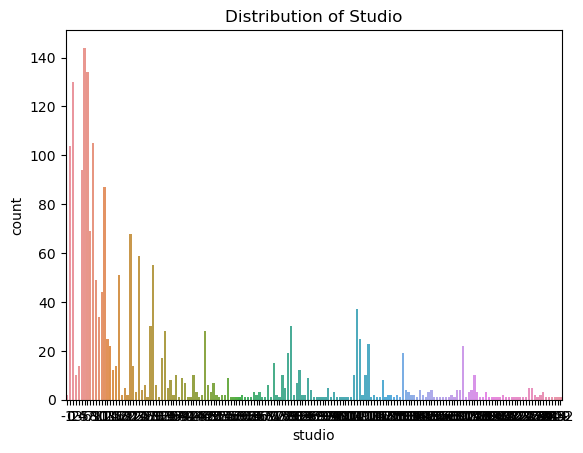

In [64]:
sns.countplot(x="studio", data=df1)
plt.title("Distribution of Studio")
plt.show()


Visualize the distribution of numerical data

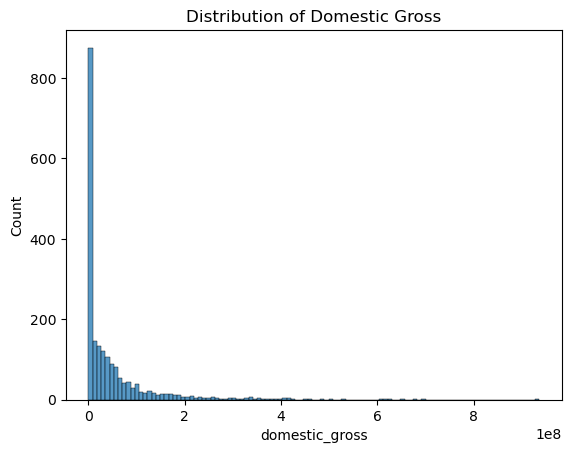

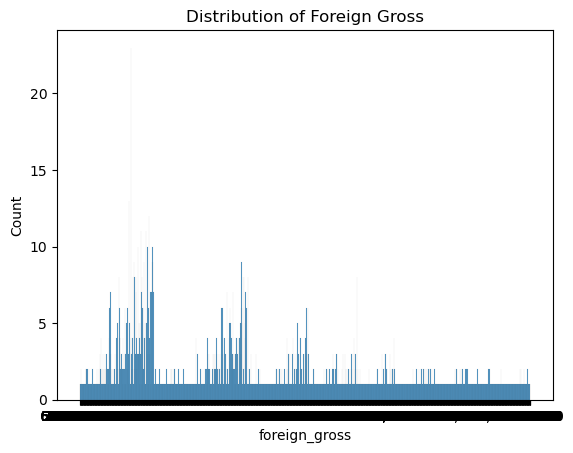

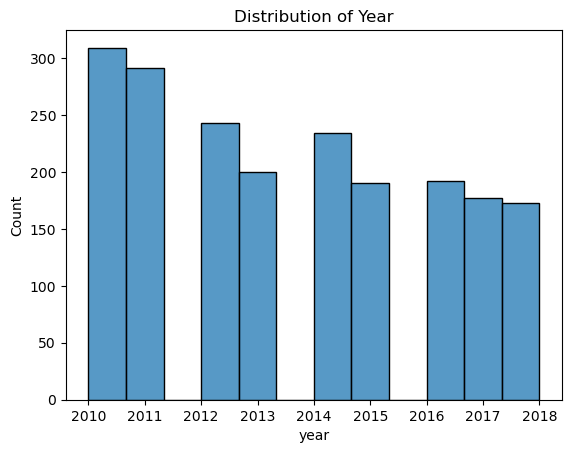

In [65]:
sns.histplot(x_variables["domestic_gross"])
plt.title("Distribution of Domestic Gross")
plt.show()

sns.histplot(x_variables["foreign_gross"])
plt.title("Distribution of Foreign Gross")
plt.show()

sns.histplot(x_variables["year"])
plt.title("Distribution of Year")
plt.show()


Visualizing the relationshipbetween independent variables 

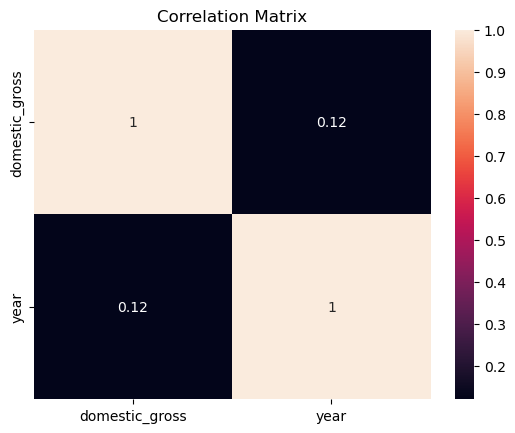

In [66]:
sns.heatmap(x_variables[["domestic_gross", "foreign_gross", "year"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


Visualizing the realtionship between independent variables and target variables


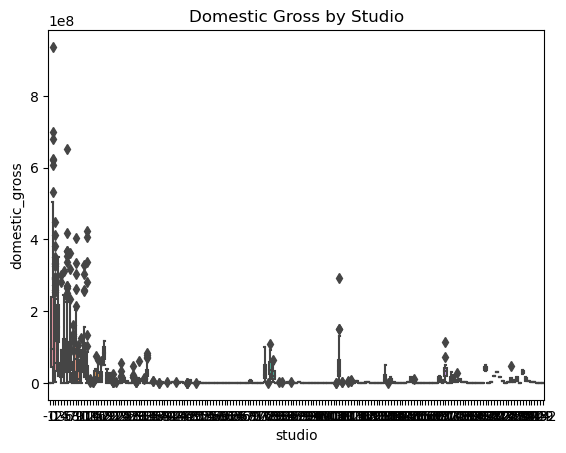

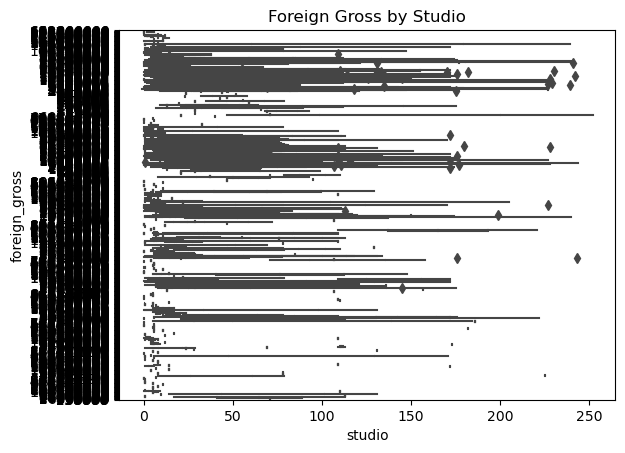

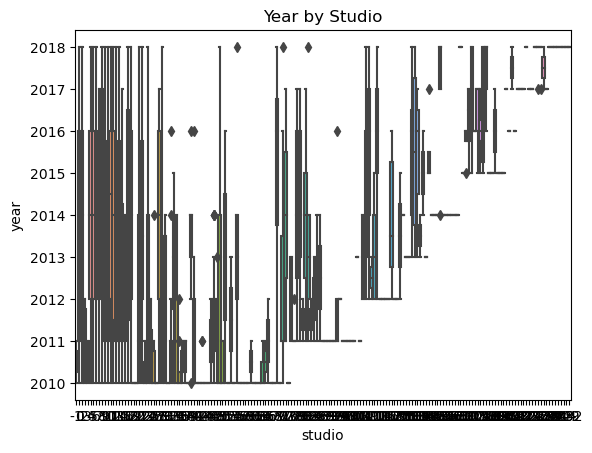

In [68]:
sns.boxplot(x="studio", y="domestic_gross", data=df1)
plt.title("Domestic Gross by Studio")
plt.show()

sns.boxplot(x="studio", y="foreign_gross", data=df1)
plt.title("Foreign Gross by Studio")
plt.show()

sns.boxplot(x="studio", y="year", data=df1)
plt.title("Year by Studio")
plt.show()


Data modelling


In [24]:
# Handling missing values